In [ ]:
# Required libraries 
import pandas as pd
import matplotlib.pyplot as plt
from aif360.datasets import CompasDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing


pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [6]:
# Load COMPAS dataset
compas = CompasDataset()

# Define privileged and unprivileged groups
privileged_groups = [{'race': 1}]   # Caucasian
unprivileged_groups = [{'race': 0}] # African-American

# Inspect dataset
print(compas.features[:5])
print(compas.labels[:5])


[[ 0. 69.  0. ...  0.  0.  0.]
 [ 0. 34.  0. ...  0.  0.  0.]
 [ 0. 24.  0. ...  0.  0.  0.]
 [ 0. 44.  0. ...  0.  0.  0.]
 [ 0. 41.  1. ...  0.  0.  0.]]
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]]


Disparate Impact: 0.8403836674666473
Mean Difference: -0.09713793951315464


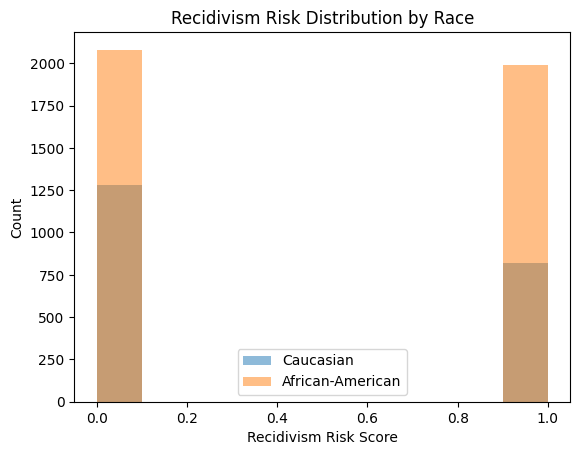

In [7]:
# Metrics on raw dataset
metric = BinaryLabelDatasetMetric(compas,
                                  privileged_groups=privileged_groups,
                                  unprivileged_groups=unprivileged_groups)

print("Disparate Impact:", metric.disparate_impact())
print("Mean Difference:", metric.mean_difference())

# Visualization: Distribution of predicted scores by race
compas_df = compas.convert_to_dataframe()[0]
plt.hist(compas_df[compas_df['race'] == 1]['two_year_recid'], alpha=0.5, label='Caucasian')
plt.hist(compas_df[compas_df['race'] == 0]['two_year_recid'], alpha=0.5, label='African-American')
plt.xlabel('Recidivism Risk Score')
plt.ylabel('Count')
plt.title('Recidivism Risk Distribution by Race')
plt.legend()
plt.show()


In [8]:
# Apply reweighing preprocessing
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
compas_transf = RW.fit_transform(compas)

# Check new metrics
metric_transf = BinaryLabelDatasetMetric(compas_transf,
                                         privileged_groups=privileged_groups,
                                         unprivileged_groups=unprivileged_groups)
print("Disparate Impact After Reweighing:", metric_transf.disparate_impact())


Disparate Impact After Reweighing: 1.0000000000000002
